In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
logs = pd.read_json('data/iter_logs.json')
logs

,Кольцевой эффект,Продольный эффект
C,"{'НУЭ': [0.0068000000000000005, 0.006802017074...","{'НУЭ': [0.0068000000000000005, 0.006800245225..."
D,"{'НУЭ': [0.017, 0.017000716175017, 0.017001432...","{'НУЭ': [0.017, 0.017000092275584, 0.017000184..."
delK_C,"{'НУЭ': [21.46922537516145, 21.47153020911233,...","{'НУЭ': [10.8793856689928, 10.879521691825737,..."
delK_D,"{'НУЭ': [15.372727827312671, 15.37644633992351...","{'НУЭ': [7.9373582597767935, 7.937590368926681..."


In [3]:
a = {col:{k: np.array(v) for k, v in logs[col]['C'].items()} for col in logs}
double_c = {col:{k: 2*np.array(v) for k, v in logs[col]['D'].items()} for col in logs}
delK_C = {col:{k: np.array(v) for k, v in logs[col]['delK_C'].items()} for col in logs}
delK_D = {col:{k: np.array(v) for k, v in logs[col]['delK_D'].items()} for col in logs}

In [4]:
a['Кольцевой эффект']['НУЭ'].shape

(301,)

In [5]:
a_logs_full = pd.DataFrame({'Кольцевой эффект':np.concatenate([values for regime, values in a['Кольцевой эффект'].items()]),
                           'Продольный эффект':np.concatenate([values for regime, values in a['Продольный эффект'].items()])})
c_logs_full = pd.DataFrame({'Кольцевой эффект':np.concatenate([values for regime, values in double_c['Кольцевой эффект'].items()]),
                           'Продольный эффект':np.concatenate([values for regime, values in double_c['Продольный эффект'].items()])})

In [6]:
a_logs_full

,Кольцевой эффект,Продольный эффект
0,0.006800,0.006800
1,0.006802,0.006800
2,0.006804,0.006800
3,0.006806,0.006801
4,0.006808,0.006801
...,...,...
356,0.007480,0.006920
357,0.007480,0.006921
358,0.007480,0.006922
359,0.007480,0.006924


# a(N)

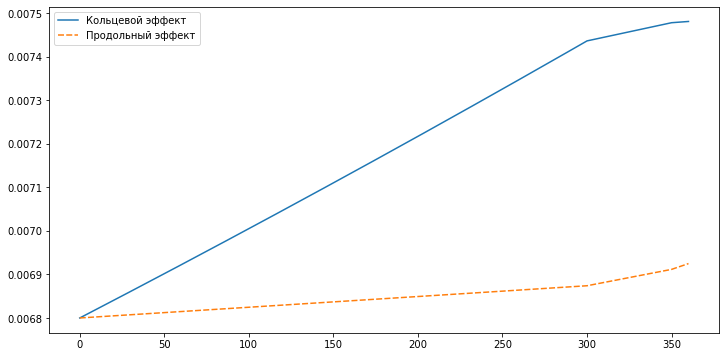

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=a_logs_full, legend='full')

# 2c(N)

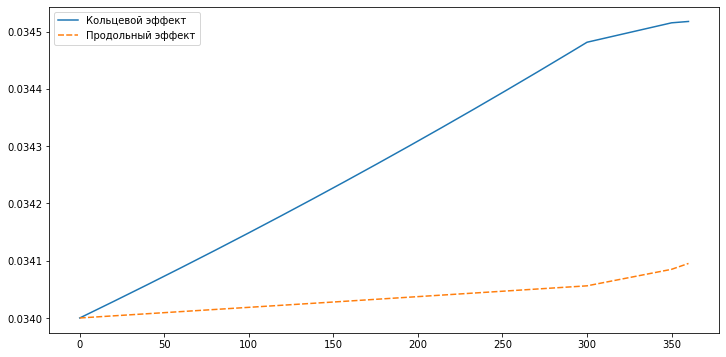

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=c_logs_full, legend='full')

In [9]:
delK_C_logs_full = pd.DataFrame({'Кольцевой эффект':np.concatenate([values for regime, values in delK_C['Кольцевой эффект'].items()]),
                                'Продольный эффект':np.concatenate([values for regime, values in delK_C['Продольный эффект'].items()])})
delK_D_logs_full = pd.DataFrame({'Кольцевой эффект':np.concatenate([values for regime, values in delK_D['Кольцевой эффект'].items()]),
                                'Продольный эффект':np.concatenate([values for regime, values in delK_D['Продольный эффект'].items()])})

# delK_C(N)

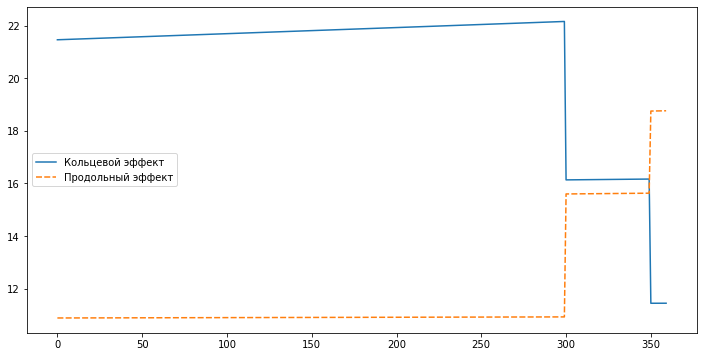

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=delK_C_logs_full, legend='full')

# delK_D(N)

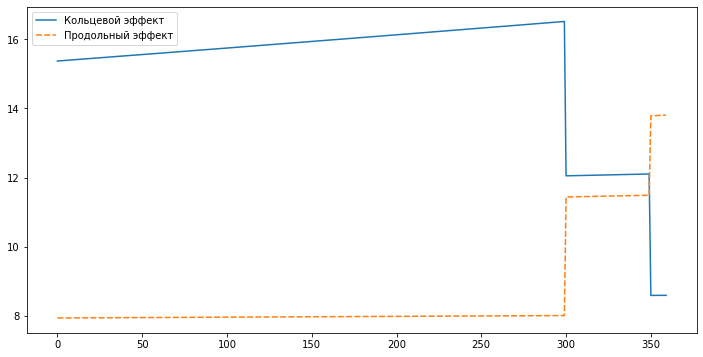

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=delK_D_logs_full, legend='full')

# stories logs

In [12]:
history = pd.read_json('data/stories_logs.json')
history_ring = history['Кольцевой эффект']
history_long = history['Продольный эффект']

history_ring = pd.DataFrame({'a_ring': history_ring['a_story'],
                        'c_ring': history_ring['c_story']})
history_long = pd.DataFrame({'a_long': history_long['a_story'],
                             'c_long': history_long['c_story']})
history = pd.concat([history_ring, history_long], axis=1)
history

,a_ring,c_ring,a_long,c_long
0,0.007481,0.017259,0.006925,0.017048
1,0.008237,0.017587,0.007052,0.017097
2,0.009077,0.018000,0.007182,0.017150
3,0.010011,0.018519,0.007314,0.017204
4,0.011049,0.019169,0.007449,0.017261
...,...,...,...,...
72,NaN,NaN,0.030125,0.046589
73,NaN,NaN,0.031086,0.048975
74,NaN,NaN,0.032118,0.051733
75,NaN,NaN,0.033233,0.054972


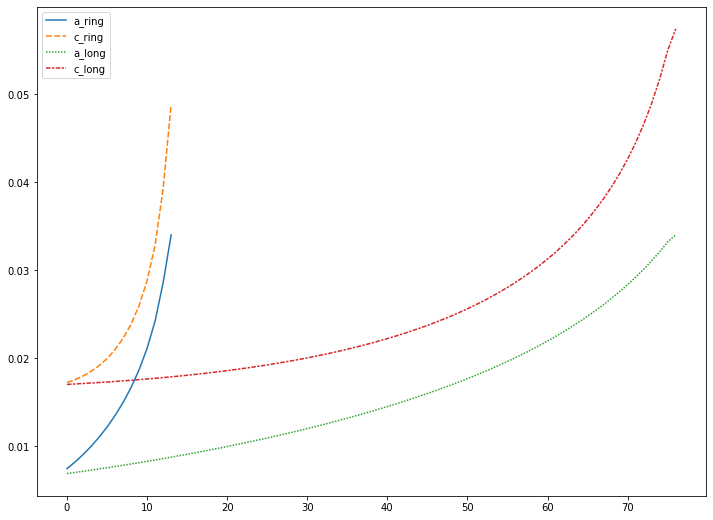

In [13]:
plt.figure(figsize=(12, 9))
sns.lineplot(data=history)